# Annulus distribution

In this notebook we create an annulus distribution, which has the following density,

$$p(x|r_0, \sigma) \propto \text{exp}(-\frac{(|x|-r_0)^2}{2\sigma^2}),$$

where $\beta > 0$ and $|x|$ is the Euclidean norm of the d-dimensional $x$. This distribution was created due to its similarity in geometry to the distribution of a high-dimensional normal (albeit in lower dimensions), for its use in testing MCMC algorithms.

Plotting a two-dimensional version of this function with $r0=10$ and $\sigma=1$.

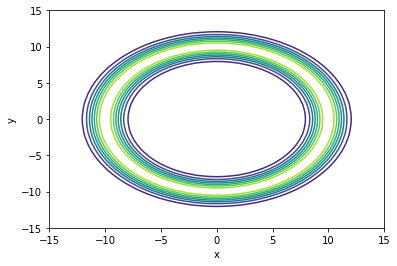

In [1]:
import pints
import pints.toy
import numpy as np
import matplotlib.pyplot as plt

# Create log pdf (default is 2-dimensional with r0=10 and sigma=1)
log_pdf = pints.toy.AnnulusLogPDF()

# Contour plot of pdf
num_points = 100
x = np.linspace(-15, 15, num_points)
y = np.linspace(-15, 15, num_points)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Generate independent samples from this distribution and plot them

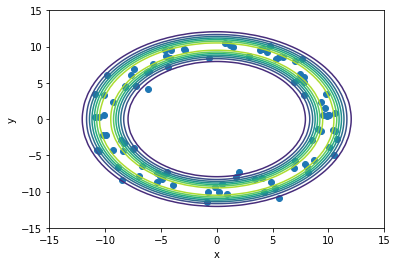

In [2]:
samples = log_pdf.sample(100)

num_points = 100
x = np.linspace(-15, 15, num_points)
y = np.linspace(-15, 15, num_points)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z)
plt.scatter(samples[:, 0], samples[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Use adaptive covariance MCMC to sample from this (un-normalised) pdf.

In [3]:
# Create an adaptive covariance MCMC routine
x0 = np.random.uniform([2, 2], [8, 8], size=(4, 2))
mcmc = pints.MCMCController(log_pdf, 4, x0, method=pints.HaarioBardenetACMC)

# Set maximum number of iterations
mcmc.set_max_iterations(4000)

# Disable logging
mcmc.set_log_to_screen(False)

# Number of chains
num_chains = 4

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Discard warm-up
chains = [chain[1000:] for chain in chains]

Running...
Done!


Scatter plot of the samples. Adaptive covariance MCMC seems to do ok at sampling from this distribution.

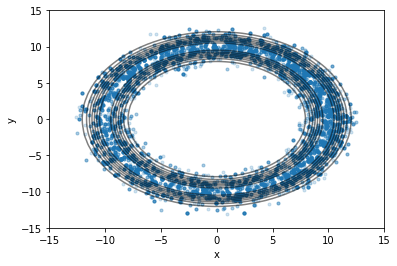

In [4]:
stacked = np.vstack(chains)
plt.contour(X, Y, Z, colors='k', alpha=0.5)
plt.scatter(stacked[:,0], stacked[:,1], marker='.', alpha=0.2)
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Try Hamiltonian Monte Carlo on same problem.

In [5]:
# Create an adaptive covariance MCMC routine
x0 = np.random.uniform([2, 2], [8, 8], size=(4, 2))
sigma0 = [2, 2]
mcmc = pints.MCMCController(log_pdf, 4, x0, method=pints.HamiltonianMCMC, sigma0=sigma0)

# Set maximum number of iterations
mcmc.set_max_iterations(500)

# Disable logging
# mcmc.set_log_to_screen(False)

# Number of chains
num_chains = 4

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Discard warm-up
chains = [chain[200:] for chain in chains]

Running...
Using Hamiltonian Monte Carlo
Generating 4 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Accept.   Time m:s
0     4      0         0         0         0          0:00.0
1     84     0.333     0.333     0.333     0.333      0:00.0
2     164    0.5       0.5       0.5       0.5        0:00.1
3     244    0.6       0.6       0.6       0.6        0:00.1
20    1604   0.909     0.909     0.909     0.909      0:00.6
40    3204   0.952381  0.952381  0.952381  0.952381   0:01.1
60    4804   0.968     0.968     0.968     0.968      0:01.7
80    6404   0.976     0.976     0.976     0.976      0:02.3
100   8004   0.98      0.98      0.98      0.98       0:02.9
120   9604   0.984     0.975     0.984     0.984      0:03.5
140   11204  0.986     0.979     0.986     0.986      0:04.1
160   12804  0.988     0.981     0.988     0.981      0:04.7
180   14404  0.989011  0.984     0.989011  0.984      0:05.4
200   16004  0.990099  0.985     0.990099  0.985      0:

A single chain of HMC moves much more naturally around the annulus.

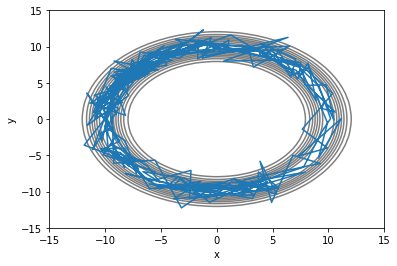

In [6]:
plt.contour(X, Y, Z, colors='k', alpha=0.5)
plt.plot(chains[0][:, 0], chains[0][:, 1])
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 3-dimensional annulus
Now creating a 3 dimensional annulus with $r0=20$ and $\sigma=0.5$, then using Adaptive covariance MCMC to sample from it.

In [7]:
log_pdf = pints.toy.AnnulusLogPDF(dimensions=3, r0=20, sigma=0.5)

# Create an adaptive covariance MCMC routine
x0 = np.zeros(log_pdf.n_parameters()) + np.random.normal(0, 1, size=(4, log_pdf.n_parameters()))
mcmc = pints.MCMCController(log_pdf, 4, x0, method=pints.HaarioBardenetACMC)

# Set maximum number of iterations
mcmc.set_max_iterations(4000)

# Disable logging
mcmc.set_log_to_screen(False)

# Number of chains
num_chains = 4

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Discard warm-up
chains = [chain[1000:] for chain in chains]
stacked = np.vstack(chains)

Running...
Done!


The samples are near to the surface of a sphere of radius 20.

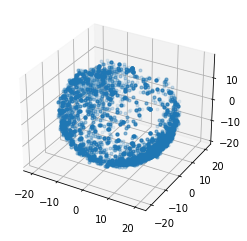

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(stacked[:, 0], stacked[:, 1], stacked[:, 2], '.', alpha=0.1)
plt.show()

We can see that the mean of the samples is a long way from the true value (0, 0, 0)

In [9]:
a_mean = np.mean(stacked, axis=0)

print("True mean = " + str(log_pdf.mean()))
print("Sample mean = " + str(a_mean))

True mean = [0. 0. 0.]
Sample mean = [ 1.01515144 -1.63421492 -4.40097874]


## 10-dimensional annulus

Now creating a 10 dimensional annulus with $r0=15$ and $\sigma=2$, then using Adaptive covariance MCMC to sample from it.

In [10]:
log_pdf = pints.toy.AnnulusLogPDF(dimensions=10, r0=15, sigma=2)

# Create an adaptive covariance MCMC routine
x0 = np.zeros(log_pdf.n_parameters()) + np.random.normal(0, 1, size=(4, log_pdf.n_parameters()))
mcmc = pints.MCMCController(log_pdf, 4, x0, method=pints.HaarioBardenetACMC)

# Set maximum number of iterations
mcmc.set_max_iterations(8000)

# Disable logging
mcmc.set_log_to_screen(False)

# Number of chains
num_chains = 4

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Discard warm-up
chains = [chain[1000:] for chain in chains]

Running...
Done!


Compare the theoretical mean and variance of the normed distance from the origin with the sample-based estimates. Does ok!

In [11]:
chain = np.vstack(chains)
d = list(map(lambda x: np.linalg.norm(x), chain))
a_mean = np.mean(d)
a_var = np.var(d)

print("True normed mean = " + str(log_pdf.mean_normed()))
print("Sample normed mean = " + str(a_mean))

print("True normed var = " + str(log_pdf.var_normed()))
print("Sample normed var = " + str(a_var))

True normed mean = 17.12813200595798
Sample normed mean = 16.077041406412935
True normed var = 3.5490740758476136
Sample normed var = 3.7946823063622426


Less good at recapitulating the actual mean.

In [12]:
a_mean = np.mean(chain, axis=0)

print("True mean = " + str(log_pdf.mean()))
print("Sample mean = " + str(a_mean))

True mean = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Sample mean = [-0.87583718  0.14168261  0.56998896  0.21603575  0.35451805 -0.13285156
 -0.10897299 -0.17354912  0.36445422 -0.1420606 ]
